In [1]:
from rdkit import Chem
from rdkit.Chem import Draw, rdFMCS, AllChem, rdMolAlign
from IPython.display import display, Image
import os
import matplotlib.pyplot as plt
from Bio import PDB

In [2]:
def generate_pharmacophore(smiles_list):
    # Create an RDKit molecule object for each SMILES string
    molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

    # Add explicit hydrogen atoms
    molecules = [Chem.AddHs(mol) for mol in molecules]

    # Generate 2D coordinates for the molecules
    for mol in molecules:
        AllChem.Compute2DCoords(mol)

    # Set the path for the BaseFeatures.fdef file
    base_features_file = os.path.join(Chem.RDConfig.RDDataDir, 'BaseFeatures.fdef')
    
    # Compute 2D pharmacophore features
    feature_factory = AllChem.BuildFeatureFactory(base_features_file)
    feat_mols = [feature_factory.GetFeaturesForMol(mol) for mol in molecules]

    # Visualize 2D structures with pharmacophore features
    img_size = (300, 300)
    for i, mol in enumerate(molecules):
        print(f"Features for molecule {i + 1}:")
        for feature in feat_mols[i]:
            print(f"  {feature.GetFamily()}\t{feature.GetType()}\t{feature.GetPos()}")
        
        # Create a copy of the molecule for highlighting specific atoms
        mol_with_highlights = Chem.Mol(mol)
        
        # Highlight specific atoms (adjust the atom indices as needed)
        highlighted_atoms = [atom.GetIdx() for atom in mol_with_highlights.GetAtoms() if atom.GetIdx() == feature.GetPos().x]
        for idx in highlighted_atoms:
            mol_with_highlights.GetAtomWithIdx(idx).SetProp("atomNote", "highlighted")

        # Draw the molecule with features
        img = Draw.MolToImage(mol_with_highlights, size=img_size)

        # Show the image
        Image(img)
        plt.imshow(img)
        plt.axis('off')
        plt.show()


Features for molecule 1:
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA44751DC0>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA44751DC0>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA44751DC0>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA44751DC0>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA55337440>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA553374C0>
  PosIonizable	BasicGroup	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA55337440>
  Hydrophobe	ThreeWayAttach	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA553374C0>
  Hydrophobe	ThreeWayAttach	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA44751DC0>
  Hydrophobe	ThreeWayAttach	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA44751DC0>
  Hydrophobe	ThreeWayAttach	<rdkit.Geometry.rdG

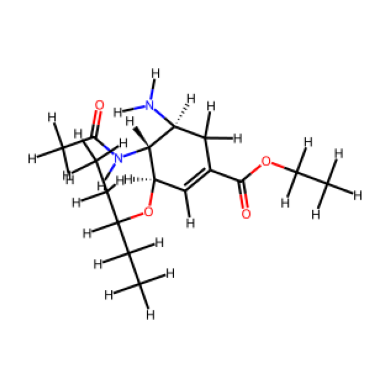

Features for molecule 2:
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA52914940>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA529447C0>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA52914940>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA529447C0>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA529447C0>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA529447C0>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA529447C0>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA529447C0>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA52914940>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA529447C0>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D ob

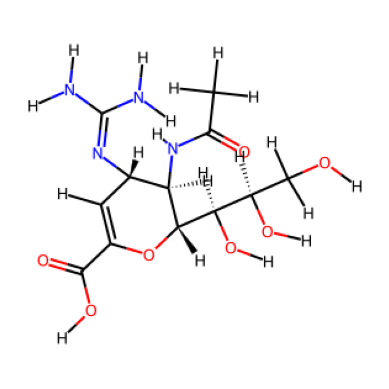

Features for molecule 3:
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA528FE140>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA5292C040>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA528FE140>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA5292C040>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA5292C040>
  Donor	SingleAtomDonor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA5292C040>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA5292C040>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA5292C040>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA528FE140>
  Acceptor	SingleAtomAcceptor	<rdkit.Geometry.rdGeometry.Point3D object at 0x000002AA5292C040>
  NegIonizable	AcidicGroup	<rdkit.Geometry.rdGeometry.Point3D

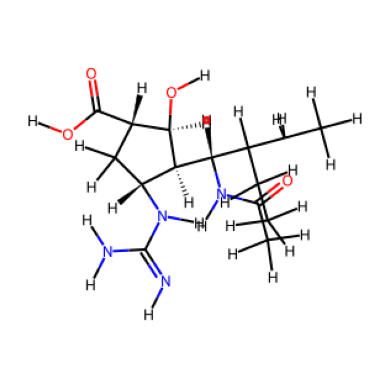

In [3]:
smiles_list = ["CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@H](N)C1",
        "[H][C@]1(OC(=C[C@H](N=C(N)N)[C@H]1NC(C)=O)C(O)=O)[C@H](O)[C@H](O)CO",
        "[H][C@@]1([C@@H](NC(C)=O)C(CC)CC)[C@H](O)[C@H](C[C@H]1NC(N)=N)C(O)=O"]

generate_pharmacophore(smiles_list)

In [4]:
def extract_neuraminidase_pharmacophore(pdb_file):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('molecule', pdb_file)

    neuraminidase_pharmacophore = {
        'HBD': [],
        'HBA': [],
        'Aro': [],
        'PosCharge': [],
        'NegCharge': [],
     
    }

    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    if atom.element == 'N' and atom.get_id()[0] == ' ':
                        neuraminidase_pharmacophore['HBD'].append(atom.get_vector())
                    elif atom.element in ['O', 'S'] and atom.get_id()[0] == ' ':
                        neuraminidase_pharmacophore['HBA'].append(atom.get_vector())
                    elif atom.element == 'C' and atom.parent.id == ' ':
                        neuraminidase_pharmacophore['Aro'].append(atom.get_vector())
                    elif atom.element == 'N' and atom.parent.resname == 'ARG':
                        neuraminidase_pharmacophore['PosCharge'].append(atom.get_vector())
                    elif atom.element == 'O' and atom.parent.resname == 'ASP':
                        neuraminidase_pharmacophore['NegCharge'].append(atom.get_vector())
            
    return neuraminidase_pharmacophore

In [5]:
# Define PDB file paths
pdb_file1 = 'Zanamivir.pdb'
pdb_file2 = 'Oseltamivir.pdb'
pdb_file3 = 'Peramivir.pdb'

In [6]:
# Extract pharmacophore features from each PDB file
neuraminidase_pharmacophore1 = extract_neuraminidase_pharmacophore(pdb_file1)
neuraminidase_pharmacophore2 = extract_neuraminidase_pharmacophore(pdb_file2)
neuraminidase_pharmacophore3 = extract_neuraminidase_pharmacophore(pdb_file3)

In [7]:
# Perform a common substructure search using RDKit
mols = [Chem.MolFromPDBFile(pdb_file1), Chem.MolFromPDBFile(pdb_file2), Chem.MolFromPDBFile(pdb_file3)]
res = rdFMCS.FindMCS(mols)
common_substructure = Chem.MolFromSmarts(res.smartsString)

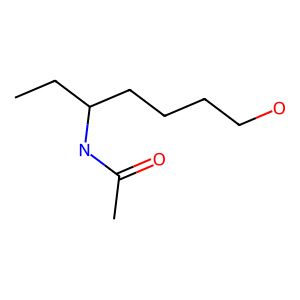

In [8]:
# Visualize the common substructure
img = Draw.MolToImage(common_substructure, size=(300, 300))
display(img)

In [9]:
# Visualize the neuraminidase pharmacophore features
def visualize_neuraminidase_pharmacophore(neuraminidase_pharmacophore, mol_file):
    mol = Chem.MolFromPDBFile(mol_file)
    AllChem.Compute2DCoords(mol)

    # Create a copy of the molecule for visualization
    mol_copy = Chem.Mol(mol)
    # Add pharmacophore features as colored dummy atoms
    for feature_type, feature_points in neuraminidase_pharmacophore.items():
        for point in feature_points:
            atom = Chem.AtomFromSmiles('*')  # Dummy atom
            atom.SetProp('PharmacophoreType', feature_type)
            atom.SetProp('Coords', ','.join(map(str, point)))
            mol_copy.AddAtom(atom)

    # Visualize the molecule with pharmacophore features
    img = Draw.MolToImage(mol_copy, size=(300, 300))
    display(img)

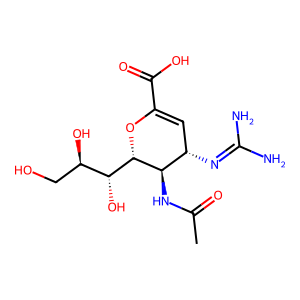

In [10]:
visualize_neuraminidase_pharmacophore(neuraminidase_pharmacophore1, pdb_file1)

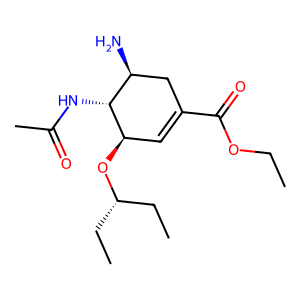

In [11]:
visualize_neuraminidase_pharmacophore(neuraminidase_pharmacophore2, pdb_file2)

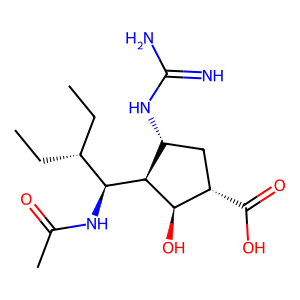

In [12]:
visualize_neuraminidase_pharmacophore(neuraminidase_pharmacophore3, pdb_file3)

In [13]:
def calculate_rmsd(custom_pdb_file, reference_pharmacophores):
    # Extract pharmacophore features from the custom PDB file
    custom_pharmacophore = extract_neuraminidase_pharmacophore(custom_pdb_file)

    # Convert pharmacophores to RDKit molecules
    custom_mol = Chem.MolFromPDBFile(custom_pdb_file)
    reference_mols = [Chem.MolFromPDBFile(pdb_file) for pdb_file in reference_pharmacophores]

    # Perform common substructure search among the custom molecule and reference molecules
    res = rdFMCS.FindMCS([custom_mol] + reference_mols)
    common_substructure = Chem.MolFromSmarts(res.smartsString)

    # Align molecules based on the common substructure
    rmsd_values = []
    for ref_mol in reference_mols:
        ref_match = ref_mol.GetSubstructMatch(common_substructure)
        custom_match = custom_mol.GetSubstructMatch(common_substructure)
        rmsd = rdMolAlign.AlignMol(custom_mol, ref_mol, atomMap=list(zip(custom_match, ref_match)))
        rmsd_values.append(rmsd)

    return rmsd_values

In [16]:
# Example usage
custom_pdb_file = 'output1.pdb'
reference_pharmacophores = [pdb_file1, pdb_file2, pdb_file3]

In [17]:
rmsd_values = calculate_rmsd(custom_pdb_file, reference_pharmacophores)

# Print RMSD values
for i, rmsd in enumerate(rmsd_values):
    print(f'RMSD between custom and reference pharmacophore {i+1}: {rmsd:.4f}')


RMSD between custom and reference pharmacophore 1: 1.8748
RMSD between custom and reference pharmacophore 2: 0.6488
RMSD between custom and reference pharmacophore 3: 1.5451
